In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
training_IDs = pd.read_csv("csv_small/trainLabels.csv", index_col=0)
df = pd.read_csv("csv_small/train_data_750.csv", index_col=0)

In [5]:
scaler=StandardScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
labels = training_IDs.loc[df.index.array]
labels = labels['Class'].to_numpy()
labels = labels.astype('int')

In [7]:
test_IDs = pd.read_csv("csv_small/test.csv", index_col=0)
df_t = pd.read_csv("csv_small/test_data_750.csv", index_col=0)

In [8]:
scaled_data_test=scaler.transform(df_t)
GT = test_IDs['Class'].to_numpy()

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation='relu',input_shape=(scaled_data.shape[1],)))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(scaled_data,labels,epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 7ms/step - loss: 1.7507 - accuracy: 0.6952
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 1.5511 - accuracy: 0.9111
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 1.5341 - accuracy: 0.9238
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 1.4957 - accuracy: 0.9651
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4932 - accuracy: 0.9683
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4892 - accuracy: 0.9714
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4814 - accuracy: 0.9810
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4801 - accuracy: 0.9810
Epoch 9/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4799 - accuracy: 0.9810
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 1.4769 - accuracy: 0.9873
Epoch 11/

In [15]:
predictions = model.predict(df_t)
predictions = [np.argmax(x) for x in predictions]

In [ ]:
predictions

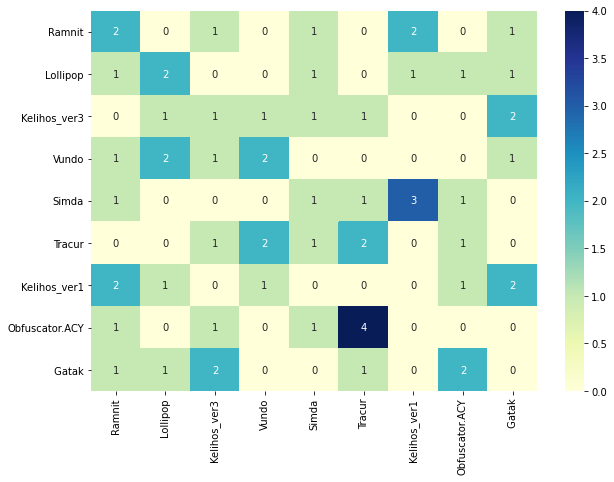

In [17]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

CLASSES = ["Ramnit",
           "Lollipop",
           "Kelihos_ver3",
           "Vundo",
           "Simda",
           "Tracur",
           "Kelihos_ver1",
           "Obfuscator.ACY",
           " Gatak"]

c = confusion_matrix(GT, predictions)

df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [18]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()

print(tp_fn)
print(tp_fp)
print(tp)

precision = tp*1.0/tp_fp
recall = tp*1.0/tp_fn

print(precision)
print(recall)

pd.DataFrame([precision, recall], 
             columns = CLASSES,
             index=['Precision','Recall'])

[7 7 7 7 7 7 7 7 7]
[9 7 7 6 6 9 6 6 7]
[2 2 1 2 1 2 0 0 0]
[0.22222222 0.28571429 0.14285714 0.33333333 0.16666667 0.22222222
 0.         0.         0.        ]
[0.28571429 0.28571429 0.14285714 0.28571429 0.14285714 0.28571429
 0.         0.         0.        ]


,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,0.222222,0.285714,0.142857,0.333333,0.166667,0.222222,0.0,0.0,0.0
Recall,0.285714,0.285714,0.142857,0.285714,0.142857,0.285714,0.0,0.0,0.0


In [211]:
accuracy = np.sum(GT == predictions) * 1.0 / len(y_test)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 2.841270


# Training a neural network for image classification


In [32]:
asm_train = pd.read_csv("csv_small/train_asm_image.csv", index_col=0)
asm_test = pd.read_csv("csv_small/test_asm_image.csv", index_col=0)

x_train = asm_train.values.tolist()
x_test = asm_test.values.tolist()

y_train = asm_train.index.array
y_test = asm_test.index.array

y_train = training_IDs.loc[y_train]
y_train = y_train['Class'].to_numpy()
y_train = y_train.astype('int')

y_test = test_IDs.loc[y_test]
y_test = y_test['Class'].to_numpy()
y_test = y_test.astype('int')

In [33]:
import cv2 as cv

def vector2img(v, ratio: int = 1):
  row = np.array(v)
  row = np.concatenate((row, np.zeros(24)),axis=0)
  row = row.reshape(32,32)
  row = row.astype(np.uint8)
  newX, newY = row.shape[1] * ratio, row.shape[0] * ratio
  img = cv.resize(row, (int(newX),int(newY)))
  return img

In [34]:
x_train = [vector2img(x) for x in x_train]
x_test = [vector2img(x) for x in x_test]

In [35]:
x_train = [x[...,np.newaxis] for x in x_train]
x_test = [x[...,np.newaxis] for x in x_test]

In [36]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [37]:
x_train.shape

(315, 32, 32, 1)

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [220]:
m.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)              

In [40]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 34ms/step - loss: 7.6819 - accuracy: 0.1365
Epoch 2/500
10/10 [==============================] - 0s 34ms/step - loss: 1.9068 - accuracy: 0.2984
Epoch 3/500
10/10 [==============================] - 0s 35ms/step - loss: 1.6312 - accuracy: 0.3619
Epoch 4/500
10/10 [==============================] - 0s 34ms/step - loss: 1.4293 - accuracy: 0.4159
Epoch 5/500
10/10 [==============================] - 0s 34ms/step - loss: 1.3089 - accuracy: 0.4349
Epoch 6/500
10/10 [==============================] - 0s 34ms/step - loss: 1.3289 - accuracy: 0.4317
Epoch 7/500
10/10 [==============================] - 0s 33ms/step - loss: 1.2857 - accuracy: 0.4159
Epoch 8/500
10/10 [==============================] - 0s 33ms/step - loss: 1.2807 - accuracy: 0.4286
Epoch 9/500
10/10 [==============================] - 0s 34ms/step - loss: 1.3063 - accuracy: 0.3873
Epoch 10/500
10/10 [==============================] - 0s 34ms/step - loss: 1.3213 - accuracy: 0.3841

In [42]:
predictions = model.predict(x_test)

In [43]:
p = [np.argmax(x) for x in predictions]

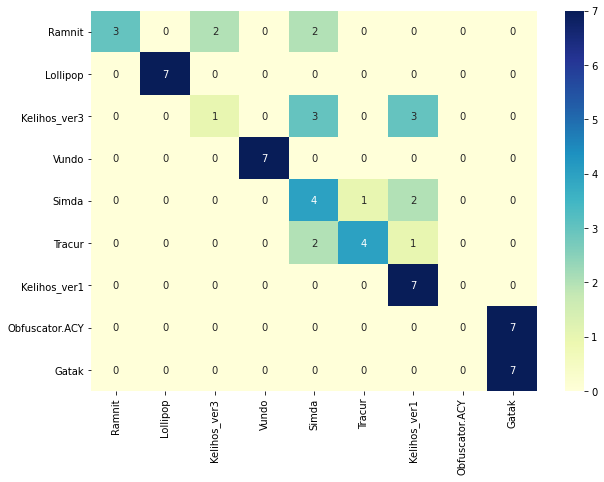

In [44]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

CLASSES = ["Ramnit",
           "Lollipop",
           "Kelihos_ver3",
           "Vundo",
           "Simda",
           "Tracur",
           "Kelihos_ver1",
           "Obfuscator.ACY",
           "Gatak"]

c = confusion_matrix(y_test, p)

df_cm = pd.DataFrame(c, index = CLASSES,
                  columns = CLASSES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [232]:
accuracy = np.sum(y_test == p) * 1.0 / len(y_test)
print("The model's accuracy is {:f}".format(accuracy))

The model's accuracy is 0.150150


In [45]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()

print(tp_fn)
print(tp_fp)
print(tp)

precision = tp*1.0/tp_fp
recall = tp*1.0/tp_fn

print(precision)
print(recall)

[7 7 7 7 7 7 7 7 7]
[ 3  7  3  7 11  5 13  0 14]
[3 7 1 7 4 4 7 0 7]
[1.         1.         0.33333333 1.         0.36363636 0.8
 0.53846154        nan 0.5       ]
[0.42857143 1.         0.14285714 1.         0.57142857 0.57142857
 1.         0.         1.        ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [234]:
pd.DataFrame([precision, recall], 
             columns = CLASSES,
             index=['Precision','Recall'])

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15015
Recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000
